In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "pop_failures.dat"
df = pd.read_table(file_path, sep="\s+")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (142, 21)


,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0.0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1.0
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1.0
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1.0
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 142 non-null    int64  
 1   Run                   142 non-null    int64  
 2   vconst_corr           142 non-null    float64
 3   vconst_2              142 non-null    float64
 4   vconst_3              142 non-null    float64
 5   vconst_4              142 non-null    float64
 6   vconst_5              142 non-null    float64
 7   vconst_7              142 non-null    float64
 8   ah_corr               142 non-null    float64
 9   ah_bolus              142 non-null    float64
 10  slm_corr              142 non-null    float64
 11  efficiency_factor     141 non-null    float64
 12  tidal_mix_max         141 non-null    float64
 13  vertical_decay_scale  141 non-null    float64
 14  convect_corr          141 non-null    float64
 15  bckgrnd_vdc1          1

In [5]:
df.dropna(inplace = True)

In [6]:
X = df.iloc[:, 2:20].values
y = df.iloc[:, 20].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

k_values = range(1, 21)
accuracies_original = []
accuracies_pca = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_original = knn.predict(X_test)
    accuracies_original.append(accuracy_score(y_test, y_pred_original))
    
    knn.fit(X_pca_train, y_train)
    y_pred_pca = knn.predict(X_pca_test)
    accuracies_pca.append(accuracy_score(y_test, y_pred_pca))

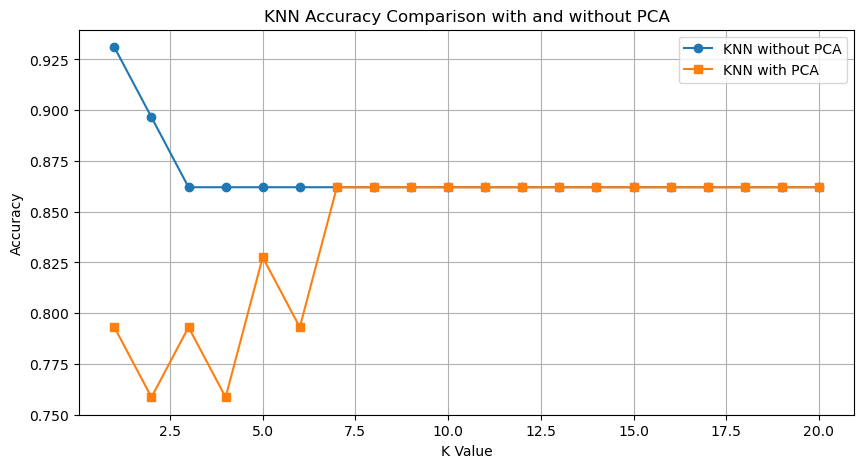

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies_original, label='KNN without PCA', marker='o')
plt.plot(k_values, accuracies_pca, label='KNN with PCA', marker='s')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison with and without PCA")
plt.legend()
plt.grid()
plt.show()